In [1]:
import numpy as np                #Álgebra lineal.
import matplotlib.pyplot as plt   #Gráficos.
plt.rc('figure', figsize=(15,8)) # (8,4))   #Para gráficos.
plt.rc('font',size=22) # 10)            #Para gráficos.

Inputs:

In [2]:
#Constante de boltzmann:
kb = 1.38e-23 #J/K
#Defino tamaño del mallado:
N = 100
#Defino la cantidad de estados posibles:
Q = 10
#Defino el número de pasos en función del tamaño de la matriz:
B = 150 #Barridos.
MCs = B*(N*N) #Pasos Monte Carlo.
T = 298 #373,523 y 773 #Temperatura en Kelvin.

Generador de números random para los estados iniciales para la matriz de estados:

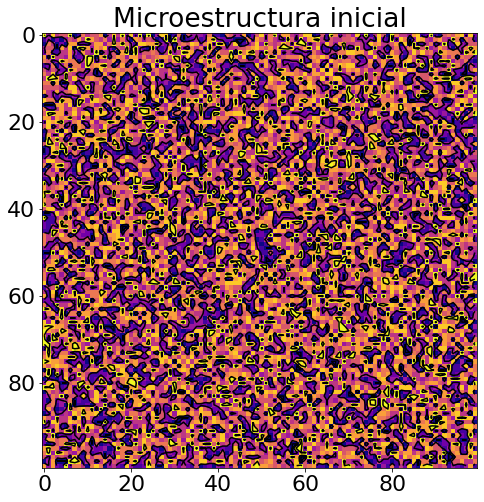

In [3]:
#Quiero que sen correspondidos a estados iniciales en un mallado cuadrado.
M = np.random.randint(1,Q+1,size=[N, N]) #No toma el último número, por eso el +1.
plt.title('Microestructura inicial')
plt.imshow(M,'plasma')
plt.contour(M, levels=(np.arange(0,Q*2,1))**2,colors='black')
plt.savefig('Microestructura inicial.png',dpi=500,bbox_inches='tight')
plt.show()

Defino la energía superficial en borde de grano:

In [4]:
J=1 #Me quedo con esta hasta encontrar otro valor y revisar si puedo hacer integrales donde aproximo los cambios con la T.

Calculo el hamiltoniano:

In [5]:
def E(IESM,J):
    En=0 #Hamiltoniano en esa matriz.
    for i in range(0,3):
        for j in range(0,3):
            if IESM[i,j]==IESM[1,1]:
                ap=1
            else:
                ap=0
            En=En-J*(ap-1) #Hamiltoniano expresado como dirac del aporte de toda la matriz.
    return En

Creo la matriz de estados del elemento indexado (IESM), donde se evalúa la energía del valor intermedio de la misma para evaluar una transición a un estado de menor energía:

In [6]:
#Tengo que tomar una región de 3x3 estados para evaluar la energía:

IESM=np.zeros((3,3))

#Cargo con los datos de la matriz de estados: (NOTA: NO SÉ EN REALIDAD SI LO TENGO QUE HACER COMO UN BARRIDO 
                                                    #O IR POR LA MATRIZ DE ESTADOS AL AZAR).
    

<div style="background:#999900"> como vimos en la teórica, en la práctica y como te comento en el informe, Metrópolis consiste en elegir elementos al azar para cambiar.
    De cualquier forma, el problema más grande acá me parece que es la cantidad de pasos MC que haces. 
    Si hicieras suficientes pasos, los resultados debieran ser los mismos
    </div>

<div style="background:#999900">Como comenté muchas veces durante la clase:
<ol>
    <li> las celdas de Jupyter Notebook no deberían ser más largas que la pantalla.
    <li> siempre que haya código repetido se puede reemplazar por una función
</ol>

</div>

In [7]:
#Planteo un barrido:

for l in range(0,3000): # B):
    for i in range(0,N): #Barrido vertical.
        for j in range(0,N): #Barrido horizontal.
        
            #Voy a tener 3 casos, esquinas, bordes y centro de la matriz. Es un estado energético superior.
            #Creo quelo correcto sería aproximar bien la energía, pero da lo mismo en la probabilidad de transición
            #ya que depende del delta de energía y supongo que interactúa igual dejo como ceros los valores fuera del material.
        
            #Esquinas:
        
            if j==0 and i==0: #Me muevo a través de los valores del centro que son los elementos a evaluar la posible transición.
        
                IESM[0,0]=0
                IESM[0,1]=0
                IESM[0,2]=0
                IESM[1,0]=0
                IESM[1,1]=M[i,j]
                IESM[1,2]=M[i,j+1]
                IESM[2,0]=0
                IESM[2,1]=M[i+1,j]
                IESM[2,2]=M[i+1,j+1]

            #Defino ceros como otro estado de energía ya que no los utilizo cambiando los valores de la zona de la superficie 
            #y dejando como átomo central a la esquina, el cual será el que se evaluará su transición. (TAMPOCO SÉ SI ES CORRECTO DEL TODO)

                #Calculo la energía para ese estado:

                Ei=E(IESM,J)

                #Genero un nuevo estado al azar:

                z=np.random.randint(1,Q+1)

                IESM[1,1]=z

                #Calculo de nuevo la energía:

                Ef=E(IESM,J)

                dE=Ef-Ei #Diferencias de energías.

                if dE<0: #Acepto el cambio.
                    
                    M[i,j]=z #Cambio el elemento en la matriz.
                    
                else: #"Pregunto" si acepto o no el cambio.

                    u=np.random.rand(1)  #Sorteo numero random entre 0 y 1.
                    pi=np.exp(-dE/(kb*T))  #Depende de la temperatura y de la diferencia de la energía entre estados. (OJO QUE ROMPO TODO A
                                                                                                                        #0K)
                    if u<pi: #Acepto el cambio.

                        M[i,j]=z #Cambio el elemento en la matriz.

            elif j==N-1 and i==0:

                IESM[0,0]=0
                IESM[0,1]=0
                IESM[0,2]=0
                IESM[1,0]=M[i,j-1]
                IESM[1,1]=M[i,j]
                IESM[1,2]=0
                IESM[2,0]=M[i+1,j-1]
                IESM[2,1]=M[i+1,j]
                IESM[2,2]=0
                
                #Calculo la energía para ese estado:

                Ei=E(IESM,J)

                #Nuevo estado random:

                z=np.random.randint(1,Q+1)

                IESM[1,1]=z

                #Calculo de nuevo la energía:

                Ef=E(IESM,J)

                dE=Ef-Ei #Diferencias de energías.

                if dE<0: #Acepto el cambio.

                    M[i,j]=z #Cambio el elemento en la matriz.

                else: #"Pregunto" si acepto o no el cambio.

                    u=np.random.rand(1)
                    pi=np.exp(-dE/(kb*T))

                    if u<pi: #Acepto el cambio.

                        M[i,j]=z #Cambio el elemento en la matriz.

            elif j==N-1 and i==N-1:

                IESM[0,0]=M[i-1,j-1]
                IESM[0,1]=M[i-1,j]
                IESM[0,2]=0
                IESM[1,0]=M[i,j-1]
                IESM[1,1]=M[i,j]
                IESM[1,2]=0
                IESM[2,0]=0
                IESM[2,1]=0
                IESM[2,2]=0

                #Calculo la energía para ese estado:

                Ei=E(IESM,J)

                #Nuevo estado random:

                z=np.random.randint(1,Q+1)

                IESM[1,1]=z

                #Calculo de nuevo la energía:

                Ef=E(IESM,J)

                dE=Ef-Ei #Diferencias de energías:

                if dE<0: #Acepto el cambio:

                    M[i,j]=z #Cambio el elemento en la matriz.

                else: #"Pregunto" si acepto o no el cambio.

                    u=np.random.rand(1)  #Sorteo numero random entre 0 y 1.
                    pi=np.exp(-dE/(kb*T))  #Depende de la temperatura y de la diferencia de la energía entre estados.

                    if u<pi: #Acepto el cambio.

                        M[i,j]=z #Cambio el elemento en la matriz.

            elif j==0 and i==N-1:

                IESM[0,0]=0
                IESM[0,1]=M[i-1,j]
                IESM[0,2]=M[i-1,j+1]
                IESM[1,0]=0
                IESM[1,1]=M[i,j]
                IESM[1,2]=M[i,j+1]
                IESM[2,0]=0
                IESM[2,1]=0
                IESM[2,2]=0

                #Calculo la energía para ese estado.

                Ei=E(IESM,J)

                #Nuevo estado random.

                z=np.random.randint(1,Q+1)

                IESM[1,1]=z

                #Calculo de nuevo la energía.

                Ef=E(IESM,J)

                dE=Ef-Ei #Diferencias de energías.

                if dE<0: #Acepto el cambio.

                    M[i,j]=z #Cambio el elemento en la matriz.

                else: #"Pregunto" si acepto o no el cambio.

                    u=np.random.rand(1)  #Sorteo numero random entre 0 y 1.
                    pi=np.exp(-dE/(kb*T))  #Depende de la temperatura y de la diferencia de la energía entre estados.

                    if u<pi: #Acepto el cambio.

                        M[i,j]=z #Cambio el elemento en la matriz.

            #Bordes:

            elif j==0: #Si se cumplieran ambas condiciones a la vez hubiesen caído arriba.

                IESM[0,0]=0
                IESM[0,1]=M[i-1,j]
                IESM[0,2]=M[i-1,j+1]
                IESM[1,0]=0
                IESM[1,1]=M[i,j]
                IESM[1,2]=M[i,j+1]
                IESM[2,0]=0
                IESM[2,1]=M[i+1,j]
                IESM[2,2]=M[i+1,j+1]

                #Calculo la energía para ese estado.

                Ei=E(IESM,J)

                #Nuevo estado random.

                z=np.random.randint(1,Q+1)

                IESM[1,1]=z

                #Calculo de nuevo la energía.

                Ef=E(IESM,J)

                dE=Ef-Ei #Diferencias de energías.

                if dE<0: #Acepto el cambio.

                    M[i,j]=z #Cambio el elemento en la matriz.

                else: #"Pregunto" si acepto o no el cambio.

                    u=np.random.rand(1)  #Sorteo numero random entre 0 y 1.
                    pi=np.exp(-dE/(kb*T))  #Depende de la temperatura y de la diferencia de la energía entre estados.

                    if u<pi: #Acepto el cambio.

                        M[i,j]=z #Cambio el elemento en la matriz.

            elif i==0:

                IESM[0,0]=0
                IESM[0,1]=0
                IESM[0,2]=0
                IESM[1,0]=M[i,j-1]
                IESM[1,1]=M[i,j]
                IESM[1,2]=M[i,j+1]
                IESM[2,0]=M[i+1,j-1]
                IESM[2,1]=M[i+1,j]
                IESM[2,2]=M[i+1,j+1]

                #Calculo la energía para ese estado.

                Ei=E(IESM,J)

                #Nuevo estado random.

                z=np.random.randint(1,Q+1)

                IESM[1,1]=z

                #Calculo de nuevo la energía.

                Ef=E(IESM,J)

                dE=Ef-Ei #Diferencias de energías.

                if dE<0: #Acepto el cambio.

                    M[i,j]=z #Cambio el elemento en la matriz.

                else: #"Pregunto" si acepto o no el cambio.

                    u=np.random.rand(1)  #Sorteo numero random entre 0 y 1.
                    pi=np.exp(-dE/(kb*T))  #Depende de la temperatura y de la diferencia de la energía entre estados.

                    if u<pi: #Acepto el cambio.

                        M[i,j]=z #Cambio el elemento en la matriz.

            elif j==N-1:

                IESM[0,0]=M[i-1,j-1]
                IESM[0,1]=M[i-1,j]
                IESM[0,2]=0
                IESM[1,0]=M[i,j-1]
                IESM[1,1]=M[i,j]
                IESM[1,2]=0
                IESM[2,0]=M[i+1,j-1]
                IESM[2,1]=M[i+1,j]
                IESM[2,2]=0

                #Calculo la energía para ese estado.

                Ei=E(IESM,J)

                #Nuevo estado random.

                z=np.random.randint(1,Q+1)

                IESM[1,1]=z

                #Calculo de nuevo la energía.

                Ef=E(IESM,J)

                dE=Ef-Ei #Diferencias de energías.

                if dE<0: #Acepto el cambio.

                    M[i,j]=z #Cambio el elemento en la matriz.

                else: #"Pregunto" si acepto o no el cambio.

                    u=np.random.rand(1)  #Sorteo numero random entre 0 y 1.
                    pi=np.exp(-dE/(kb*T))  #Depende de la temperatura y de la diferencia de la energía entre estados.

                    if u<pi: #Acepto el cambio.

                        M[i,j]=z #Cambio el elemento en la matriz.
                        
            elif i==N-1:

                IESM[0,0]=M[i-1,j-1]
                IESM[0,1]=M[i-1,j]
                IESM[0,2]=M[i-1,j+1]
                IESM[1,0]=M[i,j-1]
                IESM[1,1]=M[i,j]
                IESM[1,2]=M[i,j+1]
                IESM[2,0]=0
                IESM[2,1]=0
                IESM[2,2]=0

                #Calculo la energía para ese estado.

                Ei=E(IESM,J)

                #Nuevo estado random.

                z=np.random.randint(1,Q+1)

                IESM[1,1]=z

                #Calculo de nuevo la energía.

                Ef=E(IESM,J)

                dE=Ef-Ei #Diferencias de energías.

                if dE<0: #Acepto el cambio.

                    M[i,j]=z #Cambio el elemento en la matriz.

                else: #"Pregunto" si acepto o no el cambio.

                    u=np.random.rand(1)  #Sorteo numero random entre 0 y 1.
                    pi=np.exp(-dE/(kb*T))  #Depende de la temperatura y de la diferencia de la energía entre estados.

                    if u<pi: #Acepto el cambio.

                        M[i,j]=z #Cambio el elemento en la matriz.

            #Volumen:

            else:

                IESM[0,0]=M[i-1,j-1]
                IESM[0,1]=M[i-1,j]
                IESM[0,2]=M[i-1,j+1]
                IESM[1,0]=M[i,j-1]
                IESM[1,1]=M[i,j]
                IESM[1,2]=M[i,j+1]
                IESM[2,0]=M[i+1,j-1]
                IESM[2,1]=M[i+1,j]
                IESM[2,2]=M[i+1,j+1]

                #Calculo la energía para ese estado.

                Ei=E(IESM,J)

                #Nuevo estado random.

                z=np.random.randint(1,Q+1)

                IESM[1,1]=z

                #Calculo de nuevo la energía.

                Ef=E(IESM,J)

                dE=Ef-Ei #Diferencias de energías.

                if dE<0: #Acepto el cambio.

                    M[i,j]=z #Cambio el elemento en la matriz.

                else: #"Pregunto" si acepto o no el cambio.

                    u=np.random.rand(1)  #Sorteo numero random entre 0 y 1.
                    pi=np.exp(-dE/(kb*T))  #Depende de la temperatura y de la diferencia de la energía entre estados.

                    if u<pi: #Acepto el cambio.

                        M[i,j]=z #Cambio el elemento en la matriz.

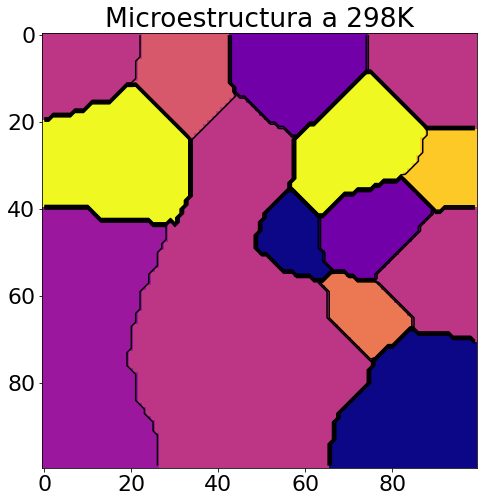

In [16]:
plt.title('Microestructura a 298K')
plt.imshow(M,'plasma')
plt.contour(M, levels=np.arange(0,Q,1) , colors='black') #Q*2+1,1))**2,colors='black')
plt.savefig('Configuracion final a 298K barridos.png',dpi=500,bbox_inches='tight')
plt.show()